<a href="https://colab.research.google.com/github/alexguttlein/TP1-AnalisisExploratorioDeDatos/blob/main/Copia_de_TP1_An%C3%A1lisis_Exploratorio_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [11]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
id = '1qAwbSZnychAEKPD572TgvgpE_33iCdvo'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cleaned-reviews.csv')

In [13]:
#cleaned_reviews = pd.read_csv("/content/cleaned-reviews.csv")
cleaned_reviews = pd.read_csv('cleaned-reviews.csv',parse_dates=['date'])

In [14]:
id2 = '1x5XJp68X_EL_GeTHYHvWL-QvFBZVyYvz'
downloaded = drive.CreateFile({'id':id2})
downloaded.GetContentFile('customer_airways_data.csv')

In [15]:
#customer_airways = pd.read_csv("/content/customer_airways_data.csv",encoding = "ISO-8859-1")
customer_airways = pd.read_csv('customer_airways_data.csv',encoding = "ISO-8859-1")

In [16]:
cleaned_reviews.head()

,Unnamed: 0,reviews,rates,date,country,verified,comments
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...


In [17]:
customer_airways.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [18]:
customer_airways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [19]:
#veo los tipos de canales de venta para luego mapearlos
customer_airways['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [20]:
#mapeo valores cualitativos de sales_channel para poder analizarlos como numericos
#Internet = 0
#Mobile = 1
#Otro = -1

def mapear_sales_channel(canal):
  if(canal == 'Internet'):
    return 0
  elif(canal == 'Mobile'):
    return 1
  return -1

customer_airways['sales_channel'] = customer_airways.sales_channel.map(mapear_sales_channel)

In [21]:
#veo los tipos de modo de viaje para luego mapearlos
customer_airways.trip_type.unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [22]:
#mapeo valores cualitativos de trip_type para poder analizarlos como numericos
#RoundTrip = 0
#CircleTrip = 1
#OneWay = 2

def mapear_trip_type(tipo):
  if(tipo == 'RoundTrip'):
    return 0
  elif(tipo == 'CircleTrip'):
    return 1
  elif(tipo == 'OneWay'):
    return 2
  return -1

customer_airways['trip_type'] = customer_airways['trip_type'].map(mapear_trip_type)

In [23]:
customer_airways['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [24]:
#mapeo valores cualitativos de flight_day para poder analizarlos como numericos
#Mon = 0      Fri=4
#Tue = 1      Sat=5
#Wed = 2      Sun=6
#Thu = 3

def mapear_flight_day(day):
  if(day == 'Mon'):
    return 0
  elif(day == 'Tue'):
    return 1
  elif(day == 'Wed'):
    return 2
  elif(day == 'Thu'):
    return 3
  elif(day == 'Fri'):
    return 4
  elif(day == 'Sat'):
    return 5
  elif(day == 'Sun'):
    return 6
  return -1

customer_airways['flight_day'] = customer_airways['flight_day'].map(mapear_flight_day)

In [25]:
#se realiza una copia del dataframe en donde solo se incluyen las variables cuantitativas para poder realizar un heatmap
customer_airways_cuant = customer_airways.copy()
customer_airways_cuant.drop(['route','booking_origin'], axis=1, inplace=True)

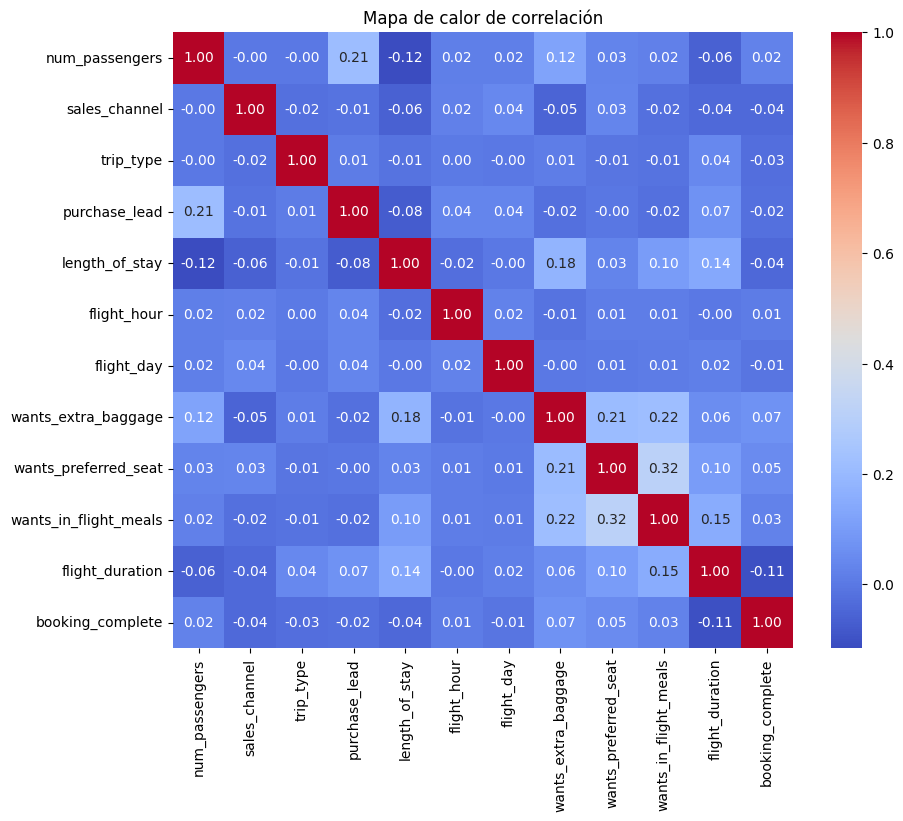

In [26]:
#se procede a realizar un heatmap para ver si existe alguna correlacion entre los diferentes campos y la confirmación de reserva
matriz_correlacion = customer_airways_cuant.corr()

#se realiza el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

En primera instancia las correlaciones mas significativas son entre los requisitos de asientos preferenciales (wants_in_flight_seat) y comida en vuelo (wants_in_flight_meals). Tambien se encuentra una leve correlación entre anticipación de reserva (purchase_lead) y número de pasajeros (num_passengers).

Pero en ninguno de los casos la correlación es lo suficientemente alta, siempre es debajo de 0,5.

# **Países qué más reservas realizan**

---



In [27]:
#agrego una columna con el total de vuelos desde cada pais de origen
customer_airways['total_reservas_origen'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('count')

In [28]:
#se agrega una columna con el total de pasajeros de cada origen VER SI HACE FALTA
customer_airways['Total pasajeros'] = customer_airways.groupby('booking_origin')['num_passengers'].transform('sum')

In [29]:
#paises origen que más buscan realizar una reserva y cuantas son realmente completadas
mas_reservas = customer_airways.groupby('booking_origin')['num_passengers'].count().sort_values(ascending=False).head(10)
mas_reservas

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: num_passengers, dtype: int64

In [30]:
#agrupo por pais origen, y veo cuantas reservas completadas tienen. Lo agrego en nueva columna
customer_airways["total_reservas_completadas"] = customer_airways.groupby('booking_origin')['booking_complete'].transform('sum')
customer_airways

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas_origen,Total pasajeros,total_reservas_completadas
0,2,0,0,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0,1074,1634,54
1,1,0,0,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0,1074,1634,54
2,2,0,0,243,22,17,2,AKLDEL,India,1,1,0,5.52,0,1270,2130,131
3,1,0,0,96,31,4,5,AKLDEL,New Zealand,0,0,1,5.52,0,1074,1634,54
4,2,0,0,68,22,15,2,AKLDEL,India,1,0,1,5.52,0,1270,2130,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,5,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900
49996,1,0,0,111,6,4,6,PERPNH,Australia,0,0,0,5.62,0,17872,25831,900
49997,1,0,0,24,6,22,5,PERPNH,Australia,0,0,1,5.62,0,17872,25831,900
49998,1,0,0,15,6,11,0,PERPNH,Australia,1,0,1,5.62,0,17872,25831,900


In [31]:
#filtro por los 10 origenes que tienen mayor cantidad de reservas
mas_reservas = customer_airways[['booking_origin','total_reservas_origen','total_reservas_completadas']].sort_values(by='total_reservas_origen', ascending=False)
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(10).reset_index()

In [32]:
mas_reservas_filtrado

,index,booking_origin,total_reservas_origen,total_reservas_completadas
0,25000,Australia,17872,900
1,23092,Malaysia,7174,2468
2,34726,South Korea,4559,462
3,32209,Japan,3885,478
4,26328,China,3387,694
5,29946,Indonesia,2369,615
6,29045,Taiwan,2077,224
7,30791,Thailand,2030,470
8,8855,India,1270,131
9,2008,New Zealand,1074,54


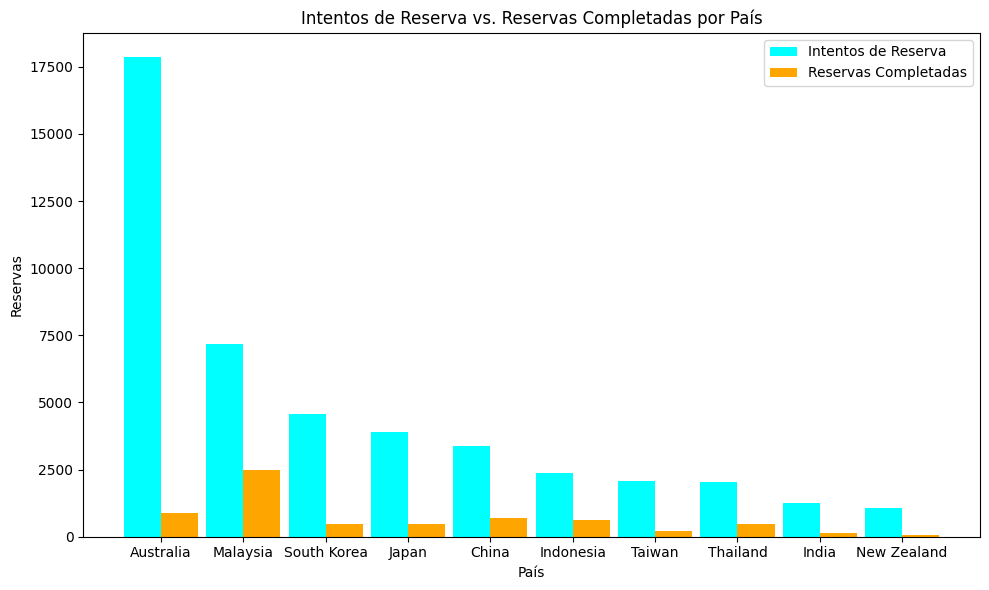

In [33]:
#grafico de barras donde se aprecia la cantidad de reservas completadas vs la cantidad de intentos de reserva desde cada origen.

#Ancho de las barras
bar_width = 0.45

# Definir la ubicación de las barras
index = range(len(mas_reservas_filtrado))

# Crear el gráfico de barras con barras dobles
plt.figure(figsize=(10, 6))
plt.bar(index, mas_reservas_filtrado['total_reservas_origen'], bar_width, label='Intentos de Reserva', color='cyan')
plt.bar([i + bar_width for i in index], mas_reservas_filtrado['total_reservas_completadas'], bar_width, label='Reservas Completadas', color='orange')

plt.xlabel('País')
plt.ylabel('Reservas')
plt.title('Intentos de Reserva vs. Reservas Completadas por País')
plt.xticks([i + bar_width / 2 for i in index], mas_reservas_filtrado['booking_origin'])
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
#se agrega columna con el porcentaje de reservas completadas desde cada origen
mas_reservas['porcentaje_completadas'] = (mas_reservas['total_reservas_completadas'] * 100) / mas_reservas['total_reservas_origen']

In [35]:
#se filtran los origenes duplicados y se dejan los 15 con mayor cantidad de vuelos
mas_reservas_filtrado = mas_reservas.drop_duplicates(subset=['booking_origin']).head(15).reset_index()
mas_reservas_filtrado

,index,booking_origin,total_reservas_origen,total_reservas_completadas,porcentaje_completadas
0,25000,Australia,17872,900,5.035810
1,23092,Malaysia,7174,2468,34.402007
2,34726,South Korea,4559,462,10.133801
3,32209,Japan,3885,478,12.303732
4,26328,China,3387,694,20.490109
5,29946,Indonesia,2369,615,25.960321
6,29045,Taiwan,2077,224,10.784786
7,30791,Thailand,2030,470,23.152709
8,8855,India,1270,131,10.314961
9,2008,New Zealand,1074,54,5.027933


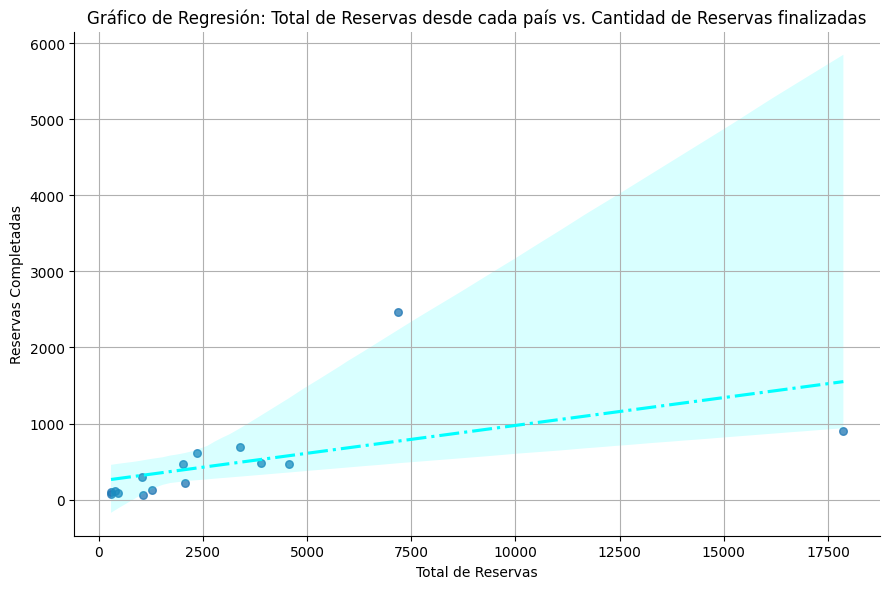

In [36]:
#se genera un gráfico de regresión para determinar si hay algo destacable en la relacion entre el origen de las reservas y la cantidad de reservas completadas.

sns.lmplot(x='total_reservas_origen', y='total_reservas_completadas', data=mas_reservas_filtrado, height=6, aspect=1.5, line_kws={'color':'cyan', 'linestyle': '-.'}, palette='pastel',
           scatter_kws={'alpha': 0.75, 's': 30})

plt.title('Gráfico de Regresión: Total de Reservas desde cada país vs. Cantidad de Reservas finalizadas')
plt.xlabel('Total de Reservas')
plt.ylabel('Reservas Completadas')
plt.grid(True)
plt.tight_layout()
plt.show()

En el gráfico anterior, como uno esperaría, a mayor cantidad de intentos de reserva hay mayor cantidad de reservas completadas. En la mayoría de los países se ve una relación lineal, a excepción de dos casos especiales:

-Se puede ver que el origen desde el que más se intenta reservar (Australia) tiene una cantidad de reservas muy por debajo de lo esperado.

-Por el contrario se puede notar que la cantidad de reservas completadas es muy elevada en el siguiente origen con mayor cantidad de interés de reserva (Malasia).

Podría considerarse que los habitantes de Malasia son más decididos a la hora de realizar una reserva, lo que podría considerarse como una gran confianza hacia la empresa. Esto podría servirle a la compañía para aumentar su publicidad en Malasia y tal vez también buscar incentivar a los Australianos para que elijan volar más con la compañía.

# **Rutas más solicitadas desde Australia**

---

In [37]:
#busco analizar si hay algun patron entre las rutas de las reservas completas y las incompletas de los australianos
australia_reservas = customer_airways.loc[customer_airways['booking_origin'] == 'Australia',:]

In [38]:
#separo las reservas australianas entre completadas y no completadas
#completadas
australia_reservas_ok = australia_reservas.loc[australia_reservas['booking_complete'] == 1,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index', axis=1)

#no completadas
australia_reservas_no = australia_reservas.loc[australia_reservas['booking_complete'] == 0,:].sort_values(by='route', ascending=True).reset_index()
australia_reservas_no = australia_reservas_no.drop('index', axis=1)

australia_reservas_ok

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas_origen,Total pasajeros,total_reservas_completadas
0,1,0,0,107,23,12,6,AKLKUL,Australia,1,0,1,8.83,1,17872,25831,900
1,2,0,0,17,5,19,3,AKLKUL,Australia,0,0,0,8.83,1,17872,25831,900
2,1,0,0,151,6,5,1,AKLKUL,Australia,0,0,1,8.83,1,17872,25831,900
3,3,0,0,112,6,12,2,AKLKUL,Australia,1,0,1,8.83,1,17872,25831,900
4,2,0,0,205,27,11,1,AORMEL,Australia,1,0,0,8.83,1,17872,25831,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1,0,0,16,4,5,3,SINSYD,Australia,0,0,0,8.58,1,17872,25831,900
896,2,0,0,264,90,9,0,SUBSYD,Australia,1,0,1,8.58,1,17872,25831,900
897,2,0,0,51,24,11,0,SYDSZX,Australia,1,1,1,8.58,1,17872,25831,900
898,1,0,0,40,119,7,6,SYDTRZ,Australia,1,1,1,8.58,1,17872,25831,900


In [39]:
#agrego una columna con el total de veces que se repite cada ruta
australia_reservas_ok['route_total'] = australia_reservas_ok.groupby('route')['booking_complete'].transform('count')
australia_reservas_no['route_total'] = australia_reservas_no.groupby('route')['booking_complete'].transform('count')

#elimino las rutas duplicadas para que cada una solo aparezca una vez con su respectivo numero de repeticiones
australia_reservas_ok = australia_reservas_ok.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_ok = australia_reservas_ok.drop('index',axis=1)

australia_reservas_no = australia_reservas_no.drop_duplicates(subset=['route']).sort_values(by='route_total', ascending=False).reset_index()
australia_reservas_no = australia_reservas_no.drop('index',axis=1)

In [40]:
#se toman las 10 rutas más consultadas para luego analizar el porcentaje de reservas completadas de cada una de estas
australia_reservas_no = australia_reservas_no.sort_values(by='route_total',ascending=False).head(10)
australia_reservas_no = australia_reservas_no[['booking_origin', 'route', 'route_total']]
australia_reservas_no

,booking_origin,route,route_total
0,Australia,MELSGN,704
1,Australia,DMKOOL,524
2,Australia,DMKPER,517
3,Australia,SGNSYD,489
4,Australia,COKSYD,445
5,Australia,CMBMEL,420
6,Australia,COKMEL,395
7,Australia,DMKSYD,368
8,Australia,PERSGN,313
9,Australia,HKTSYD,310


In [41]:
#se fusionan ambos datasets pero solo considerando las rutas más consultadas.
australia_reservas_merge = pd.merge(australia_reservas_no, australia_reservas_ok, on='route', how='left')

#al dataset de las rutas más consultadas se le agrega una columna con el total de reservas completadas para cada ruta.
australia_reservas_no['route_total_reserved'] = australia_reservas_merge['route_total_y']

#se calcula el porcentaje de reservas completadas.
australia_reservas_no['route_efectivity_average'] = (australia_reservas_no['route_total_reserved'] / australia_reservas_no['route_total']) * 100
australia_reservas_no

,booking_origin,route,route_total,route_total_reserved,route_efectivity_average
0,Australia,MELSGN,704,17,2.414773
1,Australia,DMKOOL,524,21,4.007634
2,Australia,DMKPER,517,12,2.321083
3,Australia,SGNSYD,489,38,7.770961
4,Australia,COKSYD,445,23,5.168539
5,Australia,CMBMEL,420,7,1.666667
6,Australia,COKMEL,395,23,5.822785
7,Australia,DMKSYD,368,11,2.989130
8,Australia,PERSGN,313,16,5.111821
9,Australia,HKTSYD,310,11,3.548387


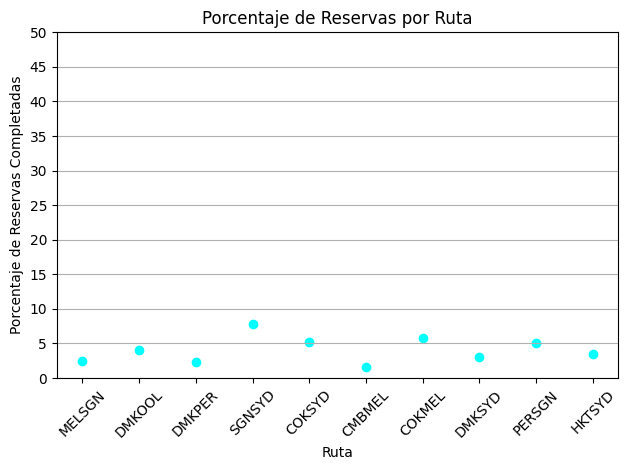

In [42]:
plt.scatter(australia_reservas_no['route'], australia_reservas_no['route_efectivity_average'], color='cyan')
#plt.figure(figsize=(8, 6))

plt.yticks(range(0, 51, 5))

plt.title('Porcentaje de Reservas por Ruta')
plt.xlabel('Ruta')
plt.ylabel('Porcentaje de Reservas Completadas')

plt.xticks(rotation=45)

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Una **conclusión** que se podría obtener de los bajos porcentajes de reservas completadas podría ser que los precios de la aerolínea son demasiado elevados para los habitantes de este país y las personas deciden volar con otra compañía.

# **Reviews de Pasajeros**

---

In [43]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3411 non-null   int64         
 1   reviews     3411 non-null   object        
 2   rates       3411 non-null   int64         
 3   date        3411 non-null   datetime64[ns]
 4   country     3411 non-null   object        
 5   verified    3411 non-null   bool          
 6   comments    3411 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(3)
memory usage: 163.3+ KB


In [44]:
#se agrega una columna con la cantidad de veces que aparece cada país
cleaned_reviews['total_country'] = cleaned_reviews.groupby('country')['comments'].transform('count')
cleaned_reviews['total_verified'] = cleaned_reviews.groupby('country')['verified'].transform('sum')

#se crea nuevo dataset sin duplicidad de paises
unique_countries = cleaned_reviews.drop_duplicates(subset='country')

**Calificaciones Generales**

---

In [45]:
cleaned_reviews['rates'].describe()

count    3411.000000
mean        4.821167
std         3.145863
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: rates, dtype: float64

Text(0.5, 1.0, 'Distribución de Calificaciones')

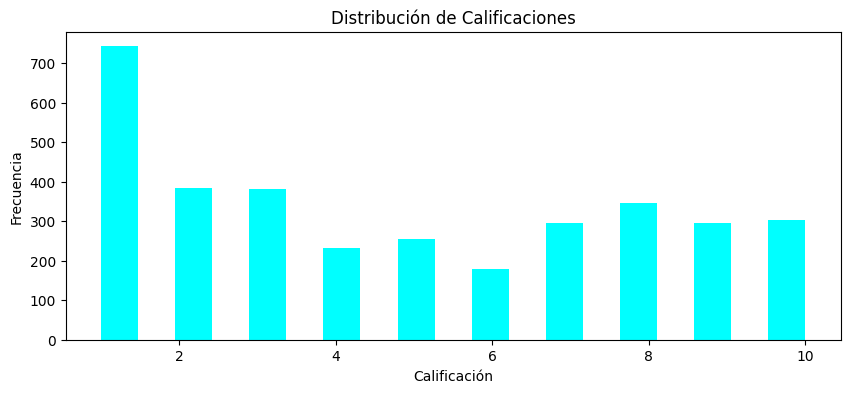

In [46]:
#histograma que muestra la distribución de la variable 'rates'
hist_rates = cleaned_reviews['rates'].plot.hist(figsize=(10,4), color='cyan', bins=19)
hist_rates.set_xlabel('Calificación')
hist_rates.set_ylabel('Frecuencia')
hist_rates.set_title('Distribución de Calificaciones')

Se puede observar una disconformidad general de los pasajeros al ver que la mayoría de las calificaciones son bajas. Se deberá analizar si se detecta algún patrón específico que determinen el sector de la población que calificó de esta manera.

**Evolución de Calificaciones a través de los años**

---

In [47]:
#se calcula cómo fueron evolucionando las calificaciones a traves del tiempo
#generales (verificadas + no verificadas)
rates_by_date = cleaned_reviews[['date', 'rates']]

rates_by_date_grouped = rates_by_date.groupby([rates_by_date['date'].dt.year.rename('año'), rates_by_date['date'].dt.month.rename('mes')]).mean()
rates_by_date_grouped = rates_by_date_grouped.reset_index()
rates_by_date_grouped

,año,mes,date,rates
0,2014,5,2014-05-23 11:22:06.315789568,5.421053
1,2014,6,2014-06-13 08:32:52.602739712,6.493151
2,2014,7,2014-07-18 16:08:43.636363520,5.963636
3,2014,8,2014-08-18 00:36:55.384615424,5.538462
4,2014,9,2014-09-13 01:07:30.000000000,5.296875
...,...,...,...,...
99,2022,9,2022-09-15 16:00:00.000000000,5.166667
100,2022,10,2022-10-20 04:34:17.142857216,5.000000
101,2022,11,2022-11-18 19:38:10.909090816,3.636364
102,2022,12,2022-12-17 17:08:34.285714176,3.571429


(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628., 18993., 19358.]),
 [Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023')])

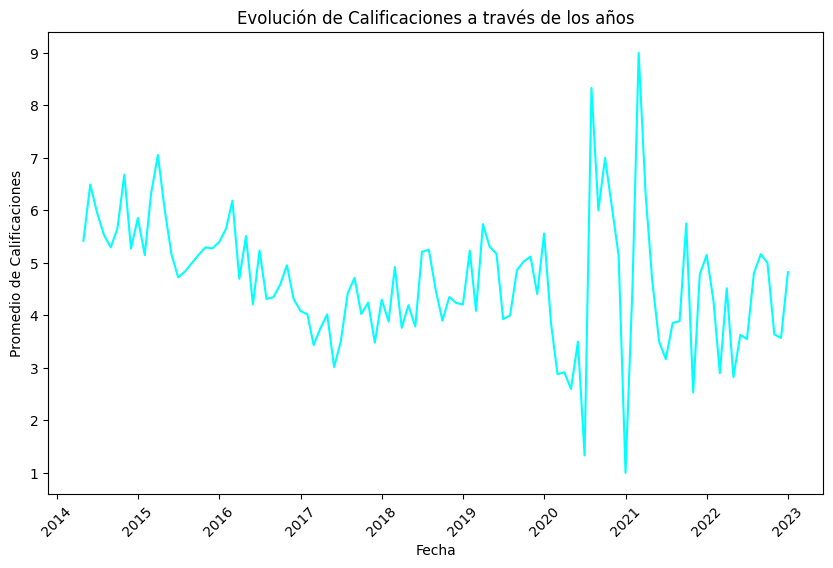

In [48]:
#se agrega una columna 'fecha' que representa (año / mes) ya que si se dejaba tambien el día habría demasiadas variables y era dificil de analizar.
rates_by_date_grouped['fecha'] = pd.to_datetime(rates_by_date_grouped['año'].astype(str) + '-' + rates_by_date_grouped['mes'].astype(str), format='%Y-%m')
rates_by_date_grouped = rates_by_date_grouped.sort_values('fecha')

#se crea un lineplot con la evolución de las calificaciones a lo largo de los últimos años.
plt.figure(figsize=(10, 6))
plt.plot(rates_by_date_grouped['fecha'], rates_by_date_grouped['rates'], color='cyan', linestyle='-')

plt.title('Evolución de Calificaciones a través de los años')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)

Inicialmente el promedio de calificaciones fue positivo, luego tuvo períodos de baja alrededor de 2017. Entre 2020 y 2021 se detectan picos anormales (positivos y negativos), esto puede deberse a que en alguna fecha específica hubo poco volumen de calificaciones, lo que provocó esos datos llamativos.

**Reviews de Pasajeros por País Origen**

---

In [49]:
cleaned_reviews_country = cleaned_reviews.copy()

In [50]:
cleaned_reviews_country.drop(['Unnamed: 0', 'date', 'reviews', 'comments'], axis=1, inplace=True)

In [51]:
cleaned_reviews_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rates           3411 non-null   int64 
 1   country         3411 non-null   object
 2   verified        3411 non-null   bool  
 3   total_country   3411 non-null   int64 
 4   total_verified  3411 non-null   int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 110.0+ KB


In [52]:
cleaned_reviews_country.groupby('country')['rates'].count().sort_values(ascending=False).head(25).reset_index()

,country,rates
0,United Kingdom,2165
1,United States,361
2,Australia,147
3,Canada,104
4,Germany,60
5,Switzerland,37
6,South Africa,37
7,Ireland,36
8,Netherlands,32
9,Singapore,27


Una curiosidad es que Malasia, siendo el país origen con mayor cantidad de reservas completadas, no aparece entre los principales países que dejan reseñas.

In [53]:
#se genera nueva columna con la sumatoria total de reviews por pais
cleaned_reviews_country['total_rates'] = cleaned_reviews_country.groupby('country')['rates'].transform('sum')

In [54]:
#se deja solo un registro por pais
cleaned_reviews_country = cleaned_reviews_country.drop_duplicates(subset='country').reset_index()
cleaned_reviews_country.drop('index', axis=1, inplace=True)

In [55]:
#se dejan solo los 25 con mayor cantidad de rate
#cleaned_reviews_country = cleaned_reviews_country.sort_values(by='total_country', ascending = False).head(25)
cleaned_reviews_country = cleaned_reviews_country.sort_values(by='total_country', ascending = False)

In [56]:
#se agrega una columna con el rate promedio por pais
cleaned_reviews_country['promedio_orig'] = cleaned_reviews_country['total_rates'] / cleaned_reviews_country['total_country']

In [57]:
#se ordena de mejor a peor promedio
cleaned_reviews_country.sort_values(by='promedio_orig', ascending = False, inplace = True)
cleaned_reviews_country = cleaned_reviews_country.reset_index()
cleaned_reviews_country.drop(['index','rates','verified'], axis=1)

,country,total_country,total_verified,total_rates,promedio_orig
0,Oman,1,0,10,10.0
1,Saint Kitts and Nevis,1,1,10,10.0
2,Laos,1,0,10,10.0
3,Botswana,2,0,18,9.0
4,Dominican Republic,1,0,9,9.0
...,...,...,...,...,...
64,Egypt,2,0,3,1.5
65,Luxembourg,2,0,2,1.0
66,Panama,1,1,1,1.0
67,Bermuda,2,1,2,1.0


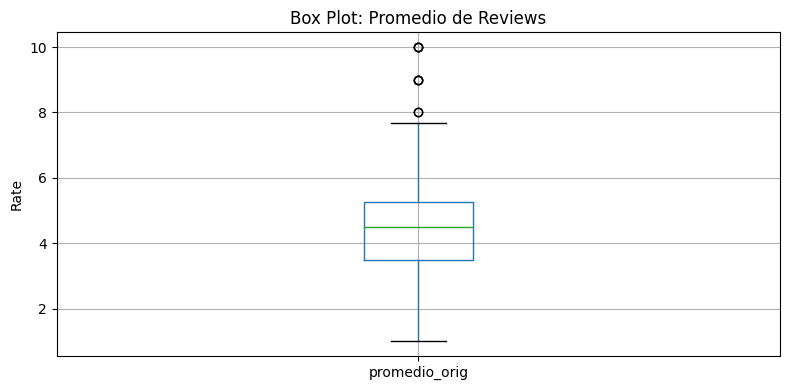

In [58]:
#se realiza boxplot para visualizar la distribución de los promedios de calificaciones
plt.figure(figsize=(8,4))
cleaned_reviews_country.boxplot(column=['promedio_orig'])

plt.title('Box Plot: Promedio de Reviews')
plt.ylabel('Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede ver que el promedio de calificaciones que tiene la aerolínea es muy bajo (entre 3 y 5). Hay casos en que los valores llegan al máximo pero pero deben considerarse outliers.

# **Anticipación de compra**

---

In [59]:
df_anticipacion = customer_airways.copy()
df_anticipacion.drop(['num_passengers','trip_type','flight_hour','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration'], axis=1, inplace=True)

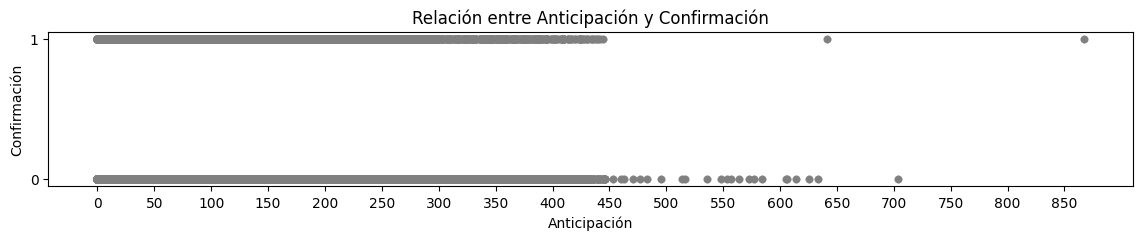

In [60]:
#se realiza un scatter plot para ver si existe una relación entre la anticipación de compra y la confirmación de la reserva.

plt.figure(figsize=(14, 2))
plt.scatter(df_anticipacion['purchase_lead'], df_anticipacion['booking_complete'], color='grey', linewidths=0.25, s=30)
plt.xlabel('Anticipación')
plt.ylabel('Confirmación')
plt.title('Relación entre Anticipación y Confirmación')

plt.xticks(np.arange(min(df_anticipacion['purchase_lead']), max(df_anticipacion['purchase_lead'])+1, 50))
plt.yticks(np.arange(min(df_anticipacion['booking_complete']), max(df_anticipacion['booking_complete'])+1, 1))

plt.show()

No se detecta una relación definida entre la anticipación y la confirmación de la reserva. Sólo se podría decir que cuando la distancia al viaje es mayor a 450 días, es improbable que se confirme una reserva.

**Anticipación de Compra Australia y Malasia**

---

In [61]:
#se busca conocer la relación entre el anticipo de reserva y la confirmación de
#la misma para las reservas con origen Australia (país con mayor cantidad de intentos de reserva).
df_anticipacion_australia = df_anticipacion.loc[df_anticipacion['booking_origin'] == 'Australia',:].reset_index()
df_anticipacion_australia.drop('index',axis=1, inplace=True)

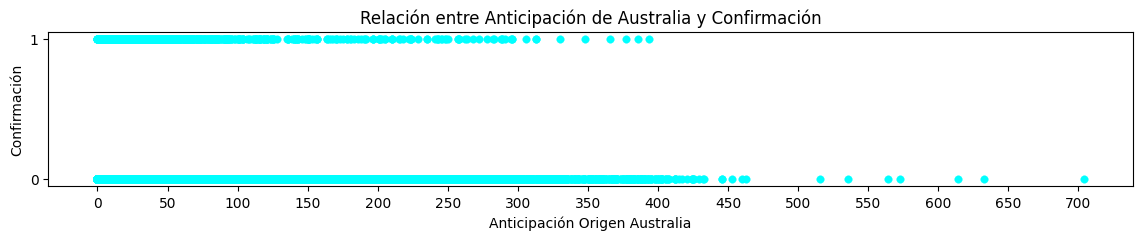

In [62]:
#se realiza un box plot para ver si existe una relación entre la anticipación de compra y la confirmación de la reserva.

plt.figure(figsize=(14, 2))
plt.scatter(df_anticipacion_australia['purchase_lead'], df_anticipacion_australia['booking_complete'], color='cyan', linewidths=0.25, s=30)
plt.xlabel('Anticipación Origen Australia')
plt.ylabel('Confirmación')
plt.title('Relación entre Anticipación de Australia y Confirmación')

plt.xticks(np.arange(min(df_anticipacion_australia['purchase_lead']), max(df_anticipacion_australia['purchase_lead'])+1, 50))
plt.yticks(np.arange(min(df_anticipacion_australia['booking_complete']), max(df_anticipacion_australia['booking_complete'])+1, 1))

plt.show()

En el caso de Australia, que son los que más intentos de reserva tienen, se puede apreciar que las reservas realizadas con más de 300 dias de anticipación son casi imposible que terminen en confirmación.

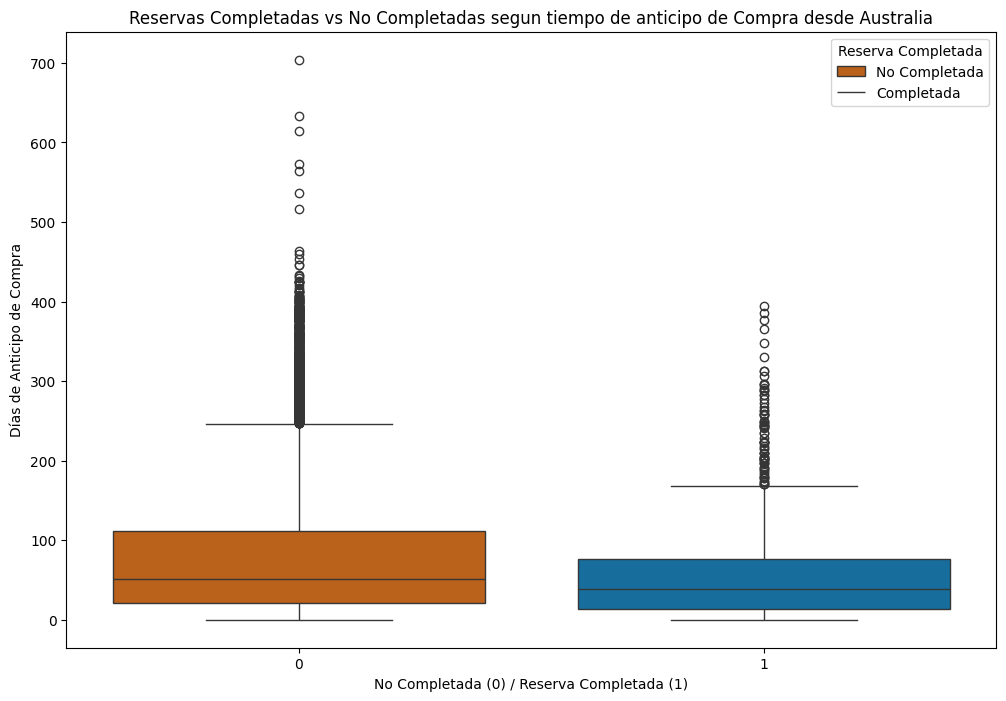

In [63]:
#se cambia el grafico de anticipacion por un boxplot

#se realiza boxplot para visualizar la relación entre anticipación de compra y confirmación de la misma para reservas procedentes de Australia

plt.figure(figsize=(12, 8))

color = ["#d55e00","#0173b2"]

sns.boxplot(x='booking_complete', y='purchase_lead', data=df_anticipacion_australia, hue='booking_complete', palette=color)
plt.title('Reservas Completadas vs No Completadas segun tiempo de anticipo de Compra desde Australia')
plt.xlabel('No Completada (0) / Reserva Completada (1)')
plt.ylabel('Días de Anticipo de Compra')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

En el caso de Australia, que son los que más intentos de reserva tienen, se puede apreciar que las reservas realizadas con más de 300 dias de anticipación son casi imposible que terminen en confirmación. La mayoría de las reservas confirmadas se realizan con menos de 100 días de anticipo.

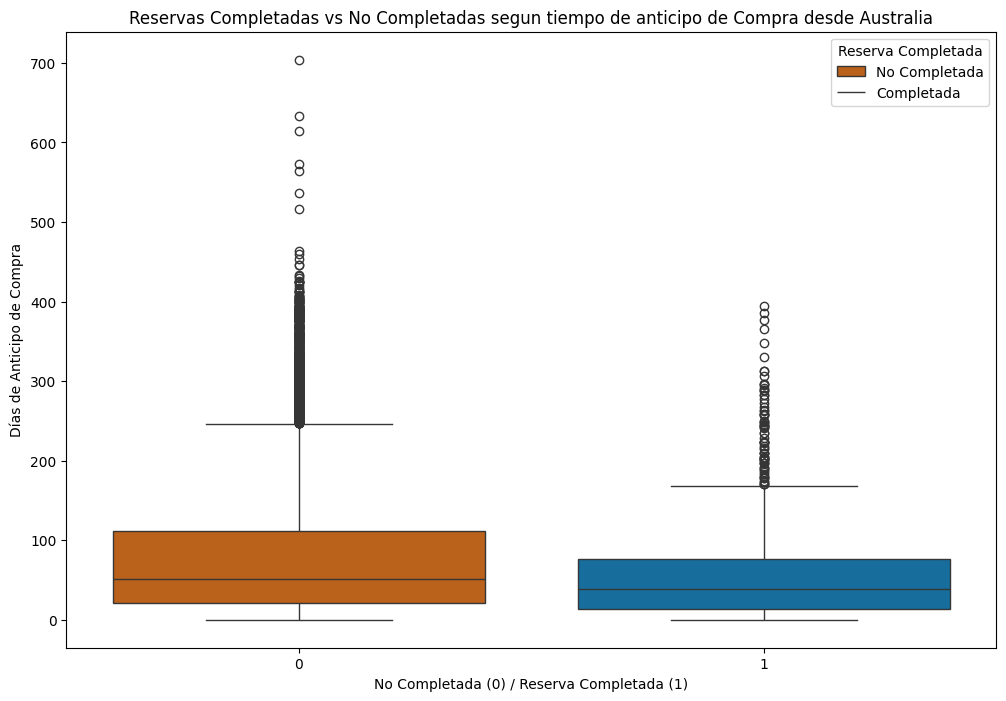

In [64]:
#se realiza boxplot para visualizar la relación entre anticipación de compra y confirmación de la misma para reservas procedentes de Malasia

plt.figure(figsize=(12, 8))

color = ["#d55e00","#0173b2"]

sns.boxplot(x='booking_complete', y='purchase_lead', data=df_anticipacion_australia, hue='booking_complete', palette=color)
plt.title('Reservas Completadas vs No Completadas segun tiempo de anticipo de Compra desde Australia')
plt.xlabel('No Completada (0) / Reserva Completada (1)')
plt.ylabel('Días de Anticipo de Compra')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

In [65]:
#de la misma manera se busca conocer la relación entre el anticipo de reserva y la confirmación de
#la misma para las reservas con origen Malasia (2do país con mayor cantidad de intentos de reserva).
df_anticipacion_malasia = df_anticipacion.loc[df_anticipacion['booking_origin'] == 'Malaysia',:].reset_index()
df_anticipacion_malasia.drop('index',axis=1, inplace=True)

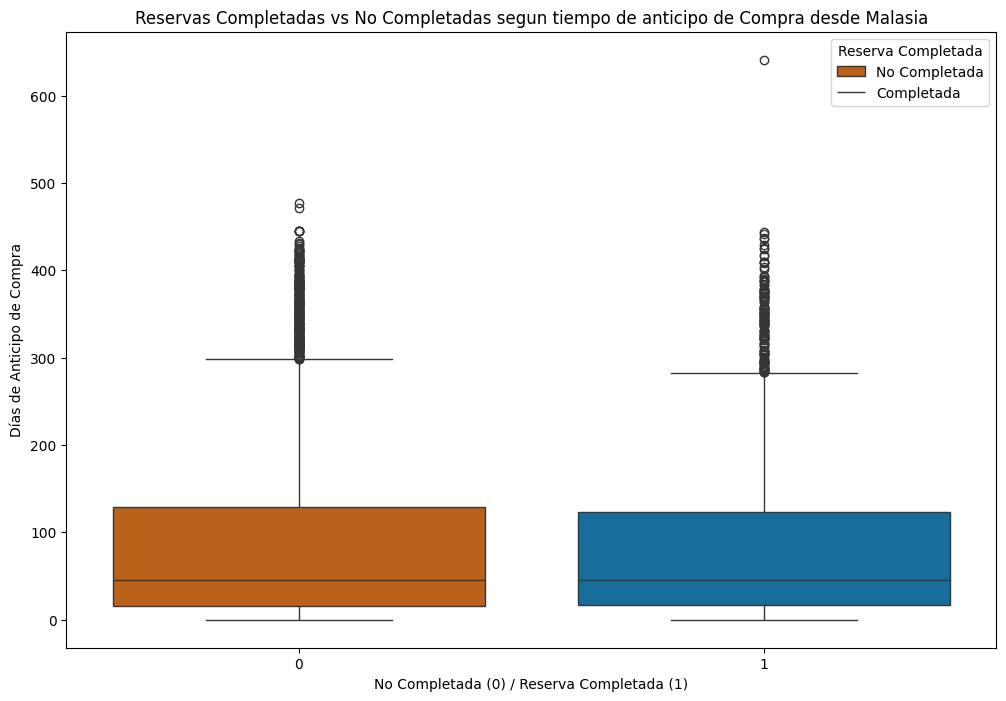

In [66]:
#se realiza boxplot para visualizar la relación entre anticipación de compra y confirmación de la misma para reservas procedentes de Malasia

plt.figure(figsize=(12, 8))

color = ["#d55e00","#0173b2"]

sns.boxplot(x='booking_complete', y='purchase_lead', data=df_anticipacion_malasia, hue='booking_complete', palette=color)
plt.title('Reservas Completadas vs No Completadas segun tiempo de anticipo de Compra desde Malasia')
plt.xlabel('No Completada (0) / Reserva Completada (1)')
plt.ylabel('Días de Anticipo de Compra')
plt.legend(title='Reserva Completada', loc='upper right', labels=['No Completada', 'Completada'])
plt.show()

En el caso de Malasia, se puede ver que una gran similitud entre la anticipación de intentos de reserva con las reservas completadas. Se podría considerar que desde este origen hay una mayor decisión al momento de reservar. Las confirmaciones por lo general se hacen hasta un poco más de 100 días antes del viaje.

In [67]:
print(sns.color_palette("colorblind").as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


# **Requisitos de Reserva**

---

In [68]:
df_requisitos = customer_airways.copy()
df_requisitos.drop(['num_passengers','trip_type','flight_hour','flight_day','flight_duration','purchase_lead','total_reservas_origen','Total pasajeros','total_reservas_completadas','route','booking_origin'], axis=1, inplace=True)

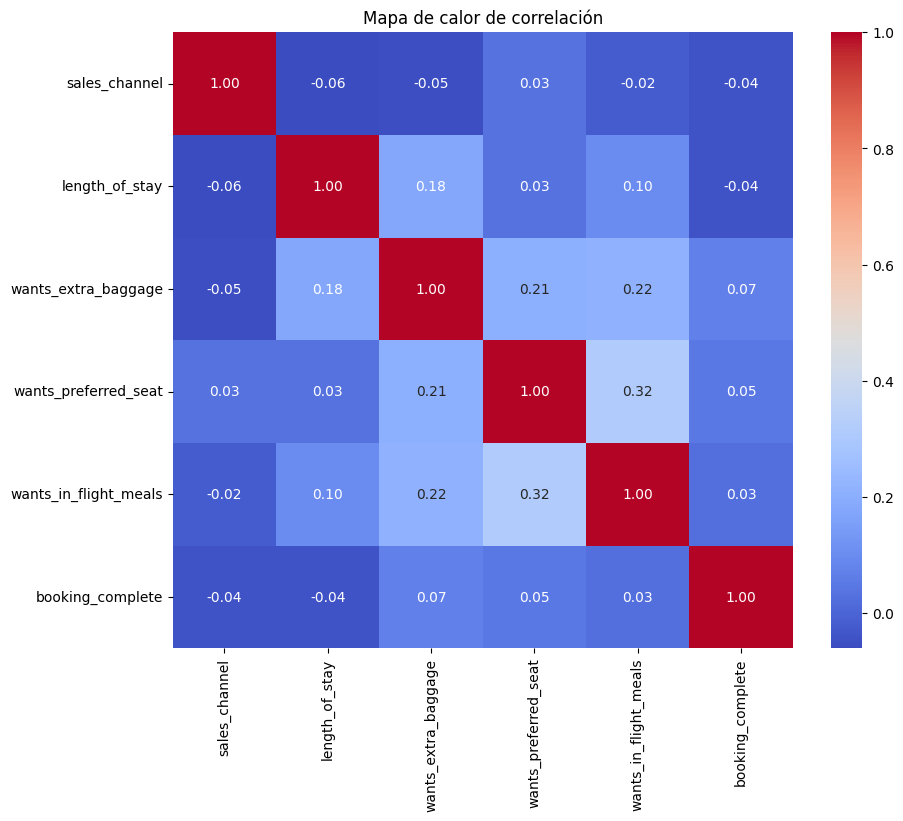

In [69]:
#se procede a realizar un heatmap para ver si existe alguna correlacion entre los diferentes requisitos y la confirmación de reserva
matriz_correlacion_req = df_requisitos.corr()

#se realiza el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_req, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

No se detecta que exista una correlación entre los requisitos de viaje y la confirmación de una reserva.

**Requisitos Reserva Australia**

In [70]:
df_requisitos_australia = customer_airways.copy()
df_requisitos_australia = df_requisitos_australia.loc[df_requisitos_australia['booking_origin'] == 'Malaysia',:]
df_requisitos_australia.drop(['num_passengers','trip_type','flight_hour','flight_day','flight_duration','purchase_lead','total_reservas_origen','Total pasajeros','total_reservas_completadas','route','booking_origin'], axis=1, inplace=True)

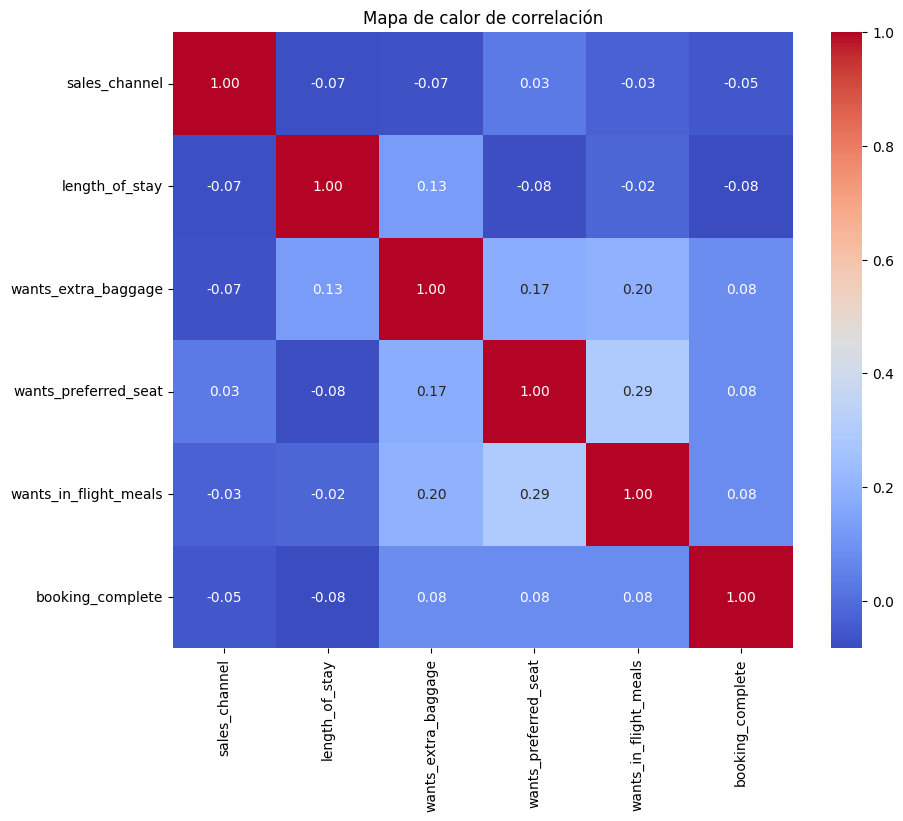

In [71]:
#se procede a realizar un heatmap para ver si existe alguna correlacion entre los diferentes requisitos y la confirmación de reserva para Australia
matriz_correlacion_req_australia = df_requisitos_australia.corr()

#se realiza el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_req_australia, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

# **Cantidad de Pasajeros**

---

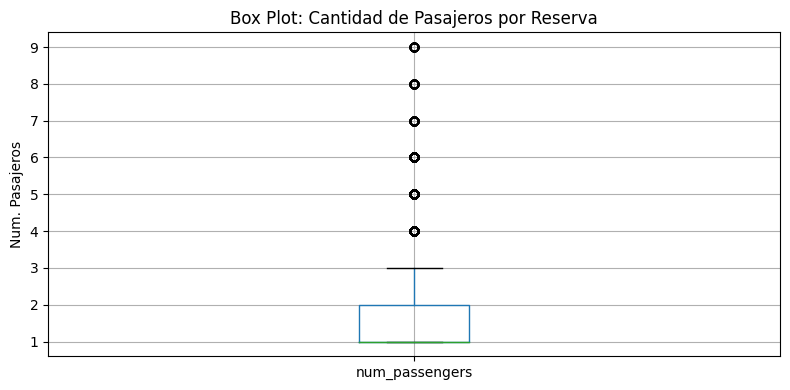

In [72]:
#se realiza boxplot para visualizar la distribución de la cantidad de pasajeros por reserva
plt.figure(figsize=(8,4))
customer_airways.boxplot(column=['num_passengers'])

plt.title('Box Plot: Cantidad de Pasajeros por Reserva')
plt.ylabel('Num. Pasajeros')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoría de las reservas tienen 1 o 2 pasajeros. Se prosigue a analizar las reservas confirmadas para individuales (1 o 2 pax) vs grupales (más de 2 pax)

**Reservas completas vs incompletas según numero de pasajeros**

---

In [73]:
customer_airways_small_groups = customer_airways.loc[customer_airways['num_passengers'] <= 2]
customer_airways_big_groups = customer_airways.loc[customer_airways['num_passengers'] > 2]

**Se analizan las confirmaciones para reservas grupales (+3 pasajeros)**

In [74]:
customer_airways_big_groups = customer_airways_big_groups.reset_index()
customer_airways_big_groups.drop(['total_reservas_completadas','Total pasajeros','total_reservas_origen','index'],axis=1,inplace=True)

In [75]:
#reservas grupales completadas
customer_airways_big_groups_complete = customer_airways_big_groups.loc[customer_airways_big_groups['booking_complete'] == 1,:]

#reservas grupales no completadas
customer_airways_big_groups_incomplete = customer_airways_big_groups.loc[customer_airways_big_groups['booking_complete'] == 0,:]

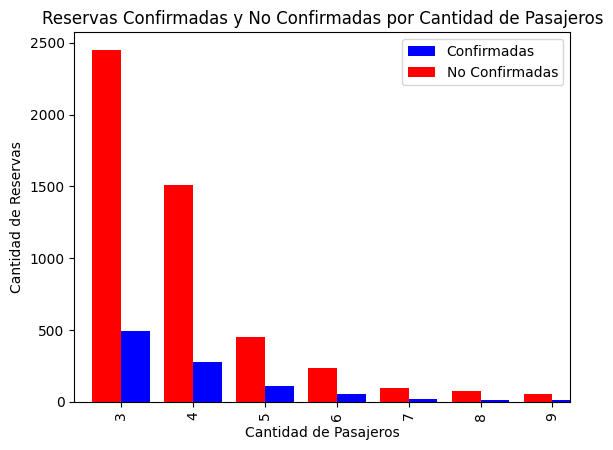

In [76]:
customer_airways_big_groups_complete_count = customer_airways_big_groups_complete.groupby('num_passengers').size()
customer_airways_big_groups_incomplete_count = customer_airways_big_groups_incomplete.groupby('num_passengers').size()

# Crear gráfico de barras doble
customer_airways_big_groups_complete_count.plot(kind='bar', color='blue', width=0.4, position=0, label='Confirmadas')
customer_airways_big_groups_incomplete_count.plot(kind='bar', color='red', width=0.4, position=1, label='No Confirmadas')

# Configurar el gráfico
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas Confirmadas y No Confirmadas por Cantidad de Pasajeros')
plt.legend()

# Mostrar el gráfico
plt.show()

**Se analizan las confirmaciones para reservas individuales (1 o 2 pasajeros)**

In [77]:
#reservas individuales completadas
customer_airways_small_groups_complete = customer_airways_small_groups.loc[customer_airways_small_groups['booking_complete'] == 1,:]

#reservas individuales no completadas
customer_airways_small_groups_incomplete = customer_airways_small_groups.loc[customer_airways_small_groups['booking_complete'] == 0,:]

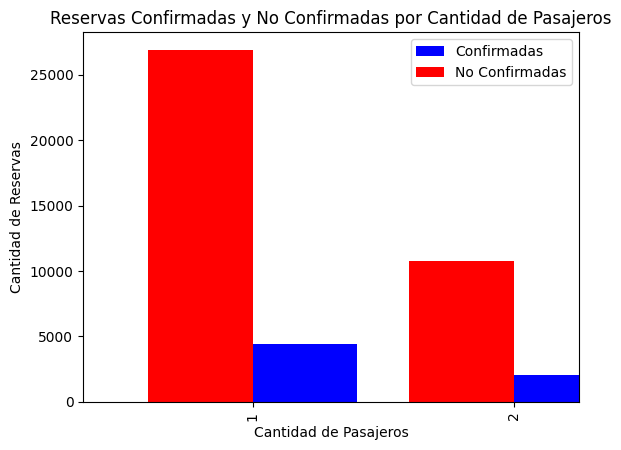

In [78]:
customer_airways_small_groups_complete_count = customer_airways_small_groups_complete.groupby('num_passengers').size()
customer_airways_small_groups_incomplete_count = customer_airways_small_groups_incomplete.groupby('num_passengers').size()

# Crear gráfico de barras doble
customer_airways_small_groups_complete_count.plot(kind='bar', color='blue', width=0.4, position=0, label='Confirmadas')
customer_airways_small_groups_incomplete_count.plot(kind='bar', color='red', width=0.4, position=1, label='No Confirmadas')

# Configurar el gráfico
plt.xlabel('Cantidad de Pasajeros')
plt.ylabel('Cantidad de Reservas')
plt.title('Reservas Confirmadas y No Confirmadas por Cantidad de Pasajeros')
plt.legend()

# Mostrar el gráfico
plt.show()

En los gráficos anteriores se puede concluir que cuanto menor es la cantidad de pasajeros, hay más búsquedas pero poco volumen de reservas completadas.

In [79]:
#Se calculan los porcentajes de reservas completadas en reservas con 1 o 2 pasajeros
customer_airways_small_groups_total = len(customer_airways_small_groups)
small_group_porcentaje_completadas = (customer_airways_small_groups['booking_complete'].sum() * 100) / customer_airways_small_groups_total

#Se calculan los porcentajes de reservas completadas en reservas con 3 o más pasajeros
customer_airways_big_groups_total = len(customer_airways_big_groups)
big_group_porcentaje_completadas = (customer_airways_big_groups['booking_complete'].sum() * 100) / customer_airways_big_groups_total

big_group_porcentaje_completadas

16.632443531827516

**Se analizan porcentajes en vez de cantidades**

---

In [80]:
#se realiza una copia del df original
customer_airways_pax = customer_airways.copy()

#se eliminan algunas columnas innecesarias
customer_airways_pax.drop(['total_reservas_completadas','Total pasajeros','total_reservas_origen'],axis=1,inplace=True)

In [81]:
#se agrega columna con el total de las reservas por numero de pasajeros
customer_airways_pax['total_reservas'] = customer_airways_pax.groupby('num_passengers')['booking_complete'].transform('count')

#se agrega columna con el total de las reservas completadas por numero de pasajeros
customer_airways_pax['total_completadas'] = customer_airways_pax.groupby('num_passengers')['booking_complete'].transform('sum')

#se agrega columna con el porcentaje de reservas completadas por numero de pasajero
customer_airways_pax['porcentaje_completadas'] =  (customer_airways_pax['total_completadas'] * 100) / customer_airways_pax['total_reservas']

In [82]:
customer_airways_pax.drop_duplicates(subset='num_passengers', inplace=True)

In [83]:
customer_airways_pax.sort_values(by='num_passengers', ascending=True, inplace=True)

In [84]:
customer_airways_pax

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_reservas,total_completadas,porcentaje_completadas
1,1,0,0,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0,31352,4455,14.209620
0,2,0,0,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0,12804,2051,16.018432
6,3,0,0,201,33,6,3,AKLDEL,New Zealand,1,0,1,5.52,0,2941,491,16.695002
12,4,0,0,265,24,19,0,AKLDEL,New Zealand,1,0,1,5.52,0,1784,275,15.414798
155,5,0,0,239,17,12,3,AKLKUL,Malaysia,1,0,1,8.83,0,561,109,19.429590
37,6,0,0,20,22,3,4,AKLICN,South Korea,1,1,1,6.62,0,289,54,18.685121
508,7,0,0,321,17,1,1,AKLKUL,Malaysia,1,0,1,8.83,0,114,18,15.789474
870,8,0,0,110,17,3,6,AKLKUL,Malaysia,1,1,0,8.83,1,89,12,13.483146
547,9,0,0,164,17,7,4,AKLKUL,Malaysia,1,0,0,8.83,0,66,13,19.696970


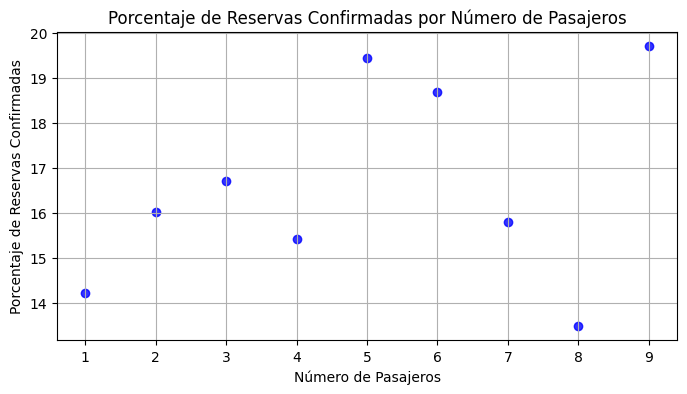

In [85]:
plt.figure(figsize=(8, 4))
plt.scatter(customer_airways_pax['num_passengers'], customer_airways_pax['porcentaje_completadas'], color='blue', alpha=0.8)

# Agregar etiquetas y título
plt.title('Porcentaje de Reservas Confirmadas por Número de Pasajeros')
plt.xlabel('Número de Pasajeros')
plt.ylabel('Porcentaje de Reservas Confirmadas')

# Mostrar el gráfico
plt.grid(True)
plt.show()

Se puede observar que las reservas individuales tienen menor posibilidad de convertirse en confirmadas.

El caso de grupos de 9 pasajeros parece ser el que tiene más probabilidad de confirmación, pero se debe ser cuidadoso con este dato ya que el numero de reservas para tal cantidad de personas es muy bajo. El mismo caso (en este caso negativo) es para reservas de 8 pasajeros.

#**Test**

---

In [86]:
reservas_usa = customer_airways.loc[customer_airways['booking_origin'] == 'United States',:]
reviews_usa = cleaned_reviews.loc[cleaned_reviews['country'] == 'United States',:]

In [87]:
#cantidad de reservas completadas USA
reservas_usa['booking_complete'].sum()

84

In [88]:
#cantidad de intentos de reserva usa
reservas_usa['booking_origin'].count()

456

In [89]:
#cantidad de reviews de usa
reviews_usa.count()

Unnamed: 0        361
reviews           361
rates             361
date              361
country           361
verified          361
comments          361
total_country     361
total_verified    361
dtype: int64

In [90]:
reservas_uk = customer_airways.loc[customer_airways['booking_origin'] == 'United Kingdom',:]
reviews_uk = cleaned_reviews.loc[cleaned_reviews['country'] == 'United Kingdom',:]

In [91]:
#cantidad de reservas completadas uk
reservas_uk['booking_complete'].sum()

21

In [92]:
#cantidad de intentos de reserva uk
reservas_uk['booking_origin'].count()

173

#**Mas sobre reviews**

---

**Opiniones más frecuentes de los reviews**

In [93]:
cleaned_reviews_comments = cleaned_reviews[['reviews', 'comments', 'country', 'rates']]
cleaned_reviews_comments

,reviews,comments,country,rates
0,✅ Trip Verified | Excellent service both on th...,excellent service ground board first class pro...,United Kingdom,5
1,✅ Trip Verified | Good lounge at Cape Town. O...,good lounge cape town time departure drink hig...,United Kingdom,9
2,✅ Trip Verified | A really excellent journey....,really excellent journey lounge overcrowded la...,United Kingdom,9
3,✅ Trip Verified | This flight was one of the ...,flight one worst ever life wanted pamper bough...,United Kingdom,9
4,Not Verified | It seems that there is a race t...,verified seems race bottom amongst airline can...,United States,2
...,...,...,...,...
3406,Flew British Airways from Sydney to Venice on ...,flew british airway sydney venice nd april ret...,Australia,10
3407,Recently for our honeymoon we took advantage o...,recently honeymoon took advantage ba promo fly...,United Kingdom,1
3408,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,lgw antigua april antigua lgw may boeing start...,United Kingdom,4
3409,LHR-JTR-LHR. A tale of opposites for BA's new ...,lhr jtr lhr tale opposite ba new route santori...,United Kingdom,2


In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
#tokenizo las palabras de las reviews
all_words = ' '.join(cleaned_reviews_comments['comments']).lower()
tokens = word_tokenize(all_words, language='english')

In [119]:
#seteo las stopwords
stop_words = set(stopwords.words('english'))

In [120]:
#elimino las stopwords de los tokens
tokens_sin_stopwords = []
for palabra in tokens:
  if palabra not in stop_words:
    tokens_sin_stopwords.append(palabra)

In [121]:
#se elimina manualmente signos de puntuación
stop_words_extra = ['.', ',', '-', "'", '?',')','(']
tokens_filtered = []

for palabra in tokens_sin_stopwords:
  if palabra not in stop_words_extra:
    tokens_filtered.append(palabra)

In [122]:
#se lematizan las palabras filtradas
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [123]:
#NO SE USA
lema = WordNetLemmatizer()
palabras_lematizadas = []

for palabra in tokens_filtered:
  palabras_lematizadas.append(lema.lemmatize(palabra))

In [124]:
good_bad_words = ['good', 'great', 'excellent', 'wonderful', 'fantastic', 'amazing', 'outstanding', 'terrific', 'awesome', 'fabulous', 'superb', 'perfect', 'top-notch', 'impressive', 'phenomenal', 'bad', 'poor', 'terrible', 'awful', 'horrible', 'disappointing', 'mediocre', 'subpar', 'unacceptable', 'unsatisfactory', 'lousy', 'abysmal', 'dreadful', 'inferior', 'not good','ok','regular','normal','fine']

In [125]:
'''
good_bad_lemmatized = []
for p in palabras_lematizadas:
  if p in good_bad_words:
    good_bad_lemmatized.append(p)
'''

good_bad = []
for p in tokens:
  if p in good_bad_words:
    good_bad.append(p)

In [126]:
#se cuenta la frecuencia de cada palabra
word_freq = Counter(good_bad)
print(word_freq.most_common())

[('good', 1981), ('great', 622), ('poor', 599), ('excellent', 551), ('ok', 448), ('fine', 323), ('bad', 296), ('awful', 190), ('terrible', 156), ('disappointing', 147), ('regular', 101), ('fantastic', 84), ('horrible', 75), ('mediocre', 70), ('amazing', 66), ('normal', 65), ('superb', 64), ('dreadful', 63), ('wonderful', 63), ('outstanding', 60), ('perfect', 48), ('unacceptable', 46), ('abysmal', 25), ('impressive', 23), ('inferior', 23), ('lousy', 19), ('terrific', 12), ('fabulous', 10), ('unsatisfactory', 7), ('awesome', 6), ('phenomenal', 1), ('subpar', 1)]


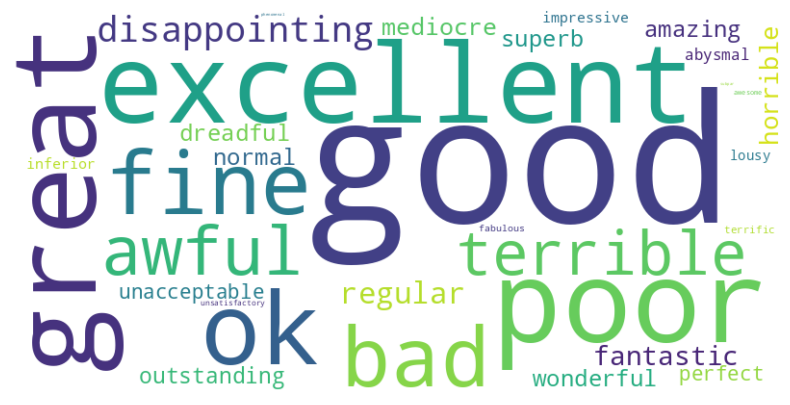

In [127]:
#se realiza un wordcloud con las palabras mas frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Opiniones más frecuentes de Australia**

[('good', 95), ('excellent', 38), ('great', 27), ('poor', 18), ('fine', 18), ('ok', 17), ('awful', 10), ('wonderful', 6), ('terrible', 5), ('lousy', 5), ('fantastic', 4), ('horrible', 4), ('outstanding', 4), ('superb', 3), ('bad', 3), ('disappointing', 3), ('dreadful', 2), ('unsatisfactory', 2), ('perfect', 2), ('amazing', 2), ('mediocre', 2), ('normal', 1), ('regular', 1), ('abysmal', 1)]


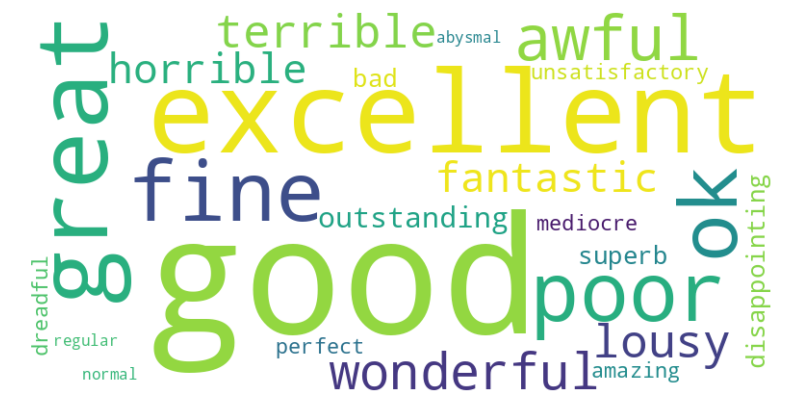

In [135]:
cleaned_reviews_comments_aus = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'Australia',:]

#tokenizo las palabras de las reviews
all_words_aus = ' '.join(cleaned_reviews_comments_aus['comments']).lower()
tokens_aus = word_tokenize(all_words_aus, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_aus = []
for palabra in tokens_aus:
  if palabra not in stop_words:
    tokens_sin_stopwords_aus.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_aus = []
for p in tokens_sin_stopwords_aus:
  if p in good_bad_words:
    good_bad_aus.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_aus = Counter(good_bad_aus)
print(word_freq_aus.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_aus = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_aus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_aus, interpolation='bilinear')
plt.axis('off')
plt.show()

**Opiniones más frecuentes de Malasia**

[('good', 7), ('poor', 3), ('mediocre', 2), ('wonderful', 2), ('excellent', 2), ('regular', 1), ('fine', 1), ('horrible', 1), ('awful', 1), ('ok', 1), ('disappointing', 1)]


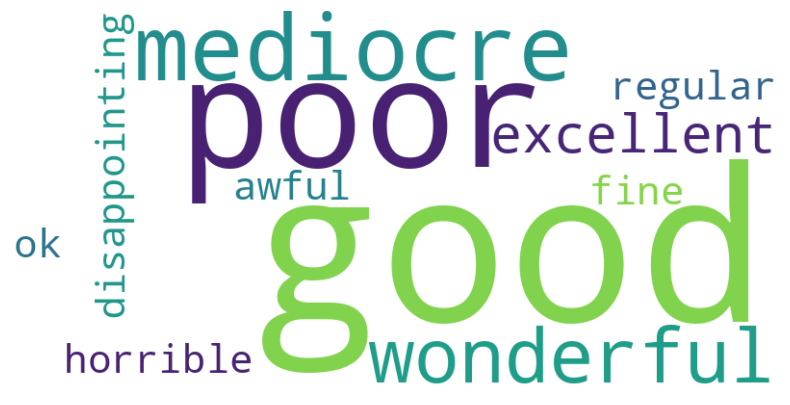

In [136]:
cleaned_reviews_comments_mal = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'Malaysia',:]

#tokenizo las palabras de las reviews
all_words_mal = ' '.join(cleaned_reviews_comments_mal['comments']).lower()
tokens_mal = word_tokenize(all_words_mal, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_mal = []
for palabra in tokens_mal:
  if palabra not in stop_words:
    tokens_sin_stopwords_mal.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_mal = []
for p in tokens_sin_stopwords_mal:
  if p in good_bad_words:
    good_bad_mal.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_mal = Counter(good_bad_mal)
print(word_freq_mal.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_mal = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_mal)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_mal, interpolation='bilinear')
plt.axis('off')
plt.show()

**Opiniones más frecuentes de Reino Unido**

[('good', 1280), ('poor', 432), ('great', 391), ('excellent', 345), ('ok', 283), ('fine', 226), ('bad', 190), ('awful', 142), ('disappointing', 102), ('terrible', 93), ('fantastic', 63), ('regular', 53), ('superb', 52), ('dreadful', 51), ('mediocre', 47), ('amazing', 46), ('normal', 46), ('horrible', 40), ('wonderful', 40), ('outstanding', 39), ('unacceptable', 31), ('perfect', 24), ('inferior', 19), ('abysmal', 18), ('impressive', 12), ('lousy', 9), ('fabulous', 8), ('terrific', 7), ('unsatisfactory', 4), ('phenomenal', 1), ('subpar', 1)]


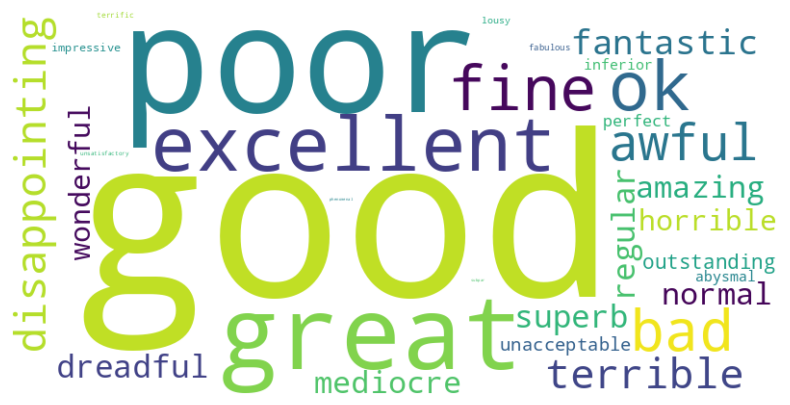

In [138]:
cleaned_reviews_comments_uk = cleaned_reviews_comments.loc[cleaned_reviews_comments['country'] == 'United Kingdom',:]

#tokenizo las palabras de las reviews
all_words_uk = ' '.join(cleaned_reviews_comments_uk['comments']).lower()
tokens_uk = word_tokenize(all_words_uk, language='english')

#elimino las stopwords de los tokens
tokens_sin_stopwords_uk = []
for palabra in tokens_uk:
  if palabra not in stop_words:
    tokens_sin_stopwords_uk.append(palabra)

#creo lista con las palabras buenas/malas que aparecen
good_bad_uk = []
for p in tokens_sin_stopwords_uk:
  if p in good_bad_words:
    good_bad_uk.append(p)

#se cuenta la frecuencia de cada palabra
word_freq_uk = Counter(good_bad_uk)
print(word_freq_uk.most_common())

#se realiza un wordcloud con las palabras mas frecuentes
wordcloud_uk = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies=word_freq_uk)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_uk, interpolation='bilinear')
plt.axis('off')
plt.show()

Para los 3 países que se consideraron ***más relevantes*** (***Australia***: mayor cantidad de cotizaciones; ***Malasia***: mayor cantidad de reservas confirmadas; ***Reino Unido***: país con más reviews), se puede apreciar que la opinión más frecuente fue **GOOD (bueno)**, por lo que se puede considerar que la aerolínea está bien vista para el público.